In [1]:
import warnings
warnings.filterwarnings("ignore")

import readPlotOptionSurface 
import modulesForCalibration as mfc

import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib import cm

In [2]:
# Parameters
alpha = 1.5
eta = 0.2
    
n = 12

# Model
model = 'Heston' 

In [3]:
# risk free rate
r = 0.0245
# dividend rate
q = 0.005
# spot price
S0 = 190.3
    

In [4]:
# set 1: Brute-Force vs. Nelder-Mead
params1 = (1.8, 0.046, 0.0925, -0.63, 0.044)
params2 = (1.9524,  0.0469,  0.1159, -0.7406,  0.0397)


# set 2: Brute-Force vs. BFGS
params1 = (1.8, 0.046, 0.0925, -0.63, 0.044)
params2 = (3.6941,  0.0478,  0.6059, -0.2186,  0.0422)

# set 2: NelderMead vs. BFGS
params1 = (1.9524,  0.0469,  0.1159, -0.7406,  0.0397)
params2 = (3.6941,  0.0478,  0.6059, -0.2186,  0.0422)


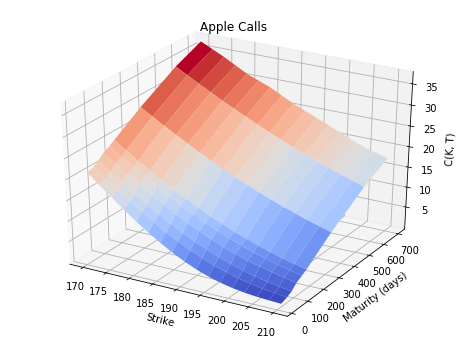

In [5]:
maturities, strikes, callPrices = readPlotOptionSurface.readNPlot()

marketPrices = callPrices
maturities_years = maturities/365.0

In [ ]:
iArray = []
rmseArray = []
rmseMin = 1e10
 
for i in mfc.myRange(-0.5, 1.5, 0.05):
    
    params = i*np.array(params1) + (1.0-i)*np.array(params2)
    print('')
    print(i)
    print(params)
    iArray.append(i)
     
    rmse = mfc.eValue(params, marketPrices, maturities_years, strikes, r, q, S0, alpha, eta, n, model)
    rmseArray.append(rmse)
    if (rmse < rmseMin):
        rmseMin = rmse
        optimParams = params


-0.5
[ 4.56495  0.04825  0.8509   0.0424   0.04345]

-0.45
[ 4.477865  0.048205  0.8264    0.0163    0.043325]

-0.4
[ 4.39078  0.04816  0.8019  -0.0098   0.0432 ]

-0.35000000000000003
[ 4.303695  0.048115  0.7774   -0.0359    0.043075]

-0.30000000000000004
[ 4.21661  0.04807  0.7529  -0.062    0.04295]

-0.25000000000000006
[ 4.129525  0.048025  0.7284   -0.0881    0.042825]

-0.20000000000000007
[ 4.04244  0.04798  0.7039  -0.1142   0.0427 ]

-0.15000000000000008
[ 3.955355  0.047935  0.6794   -0.1403    0.042575]

-0.10000000000000007
[ 3.86827  0.04789  0.6549  -0.1664   0.04245]

-0.05000000000000007
[ 3.781185  0.047845  0.6304   -0.1925    0.042325]

-6.938893903907228e-17
[ 3.6941  0.0478  0.6059 -0.2186  0.0422]

0.04999999999999993
[ 3.607015  0.047755  0.5814   -0.2447    0.042075]

0.09999999999999994
[ 3.51993  0.04771  0.5569  -0.2708   0.04195]

0.14999999999999994
[ 3.432845  0.047665  0.5324   -0.2969    0.041825]

0.19999999999999996
[ 3.34576  0.04762  0.5079  -0.

In [ ]:
print(rmseMin)
print(optimParams)

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(iArray, rmseArray, 'o--')
plt.plot(iArray[10], rmseArray[10], 'ro')
plt.plot(iArray[30], rmseArray[30], 'ro')
plt.grid(alpha=0.25)
plt.xlabel('$\\alpha$')
plt.ylabel('root mean square error (RMSE)')
plt.title('RMSE as a function of $\\alpha$')
plt.savefig('NelderMeadBFGS.png')
plt.show()